In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline

Telco_churn = pd.read_csv('/Users/razan/Desktop/Assignment2/Telco-Customer-Churn.csv')
Telco_churn.shape

(7045, 21)

In [2]:
Telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 # A1) a: --- As you can see there are (7045 Rows × 21 Columns) ---

In [3]:
Telco_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7045.000000,7045.000000,7045.000000,7034.000000
mean,0.162101,32.365507,64.759035,2282.935222
std,0.368569,24.561012,30.086200,2266.602273
min,0.000000,-10.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.350000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3793.775000
max,1.000000,72.000000,118.750000,8684.800000


In [4]:
Telco_churn.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045,7045
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5575-GNVDE,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2,3557,3643,4935,6363,3392,3096,3498,3089,3096,3475,2812,2787,3876,4172,2365,5175


# A1) b: --- Presenting a statistical description of the features ---

In [5]:
Telco_churn.duplicated().sum()

2

In [6]:
Telco_churn = Telco_churn.drop_duplicates(keep='first')

In [7]:
Telco_churn.shape

(7043, 21)

# A2) a: -- (Duplicated data) There are 2 records that exactly match each other --

In [8]:
Telco_churn['tenure'].min()

-10

In [9]:
for i in range(Telco_churn.shape[0]):
    if Telco_churn.tenure.loc[i] < 0:
        Telco_churn.tenure.loc[i] = 0
Telco_churn['tenure'].min()

0

# A2) b: --- Irrelevant or incorrect values (tenure has negative value) ---

In [10]:
Telco_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Fill the missing values with the mean of the column
Telco_churn = Telco_churn.fillna(value = Telco_churn['TotalCharges'].mean())
Telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# A2) c: --- There are 11 Missing values in (TotalCharges) ---

In [12]:
Telco_churn.drop(["customerID"],axis=1,inplace=True)

In [13]:
Telco_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  A3) a: --- Dropping irrelevant data (customer ID) ---

In [16]:
churn = {'Yes':1, 'No':0}
Telco_churn['Churn'].replace(churn, inplace=True)
Telco_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [17]:
Telco_churn[['gender','Churn']].groupby(['gender']).mean()*100

,Churn
gender,
Female,26.920872
Male,26.160338


<AxesSubplot:xlabel='gender'>

<Figure size 360x288 with 0 Axes>

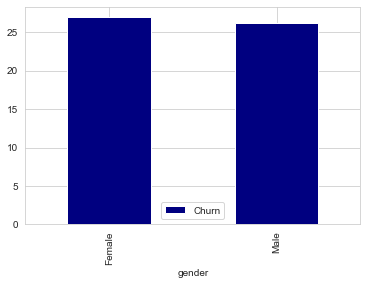

In [18]:
Telco_plot = Telco_churn[['gender','Churn']].groupby(['gender']).mean()*100
plt.figure(figsize=(5,4))
Telco_plot.plot(kind='bar',color='navy')

# A4) a: -- (Female) percentage which left the company is 26.92%, (Male) percentage which left the company is 26.16%. Since the genders percentages are very close that means that it doesn't have an effect on churn. --

In [19]:
churn = {1:'Yes', 0:'No'}
Telco_churn.Churn.replace(churn, inplace=True)
senior_citizen = {1:'Yes', 0:'No'}
Telco_churn.SeniorCitizen.replace(senior_citizen, inplace=True)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

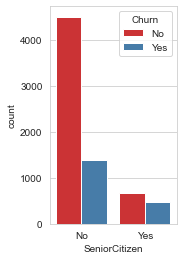

In [20]:
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
sns.countplot(data = Telco_churn , x = 'SeniorCitizen' , hue = 'Churn', palette = "Set1")

In [21]:
Telco_churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)*100

SeniorCitizen  Churn
No             No       76.393832
               Yes      23.606168
Yes            No       58.318739
               Yes      41.681261
Name: Churn, dtype: float64

# A4) b: -- The percentage of elderly people who left the company is (41.68%) and it indicates that almost half of the senior citizens left so it effects on churn. unlike the non-senior citizens (76.39%) didn't leave and only (23.60%) left. --

<AxesSubplot:xlabel='Contract', ylabel='count'>

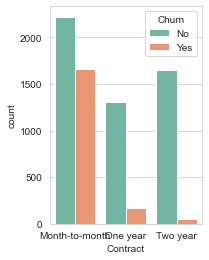

In [22]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(data = Telco_churn , x = 'Contract' , hue = 'Churn', palette = "Set2")

In [23]:
Telco_churn.groupby('Contract')['Churn'].value_counts(normalize=True)*100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: Churn, dtype: float64

# A4) c: -- More than half of customers use a Month-to-month contract option and more customers churn on monthly plans (42.70%) almost half of them, so when a customer has a longer contract the churn gets lower,(11.26%) churned when their contract was One-Year and (2.8%) only churned when their contract was Two-years. --

In [25]:
Telco_churn.shape

(7043, 20)

In [24]:
Telco_churn.to_csv('/Users/razan/Desktop/Assignment2/Telco-Customer-Churn.csv')